[0. 1. 3. 5. 6. 7. 8.]


/tmp/ipykernel_53566/1756455197.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_cmap = plt.cm.get_cmap('tab20', 9)


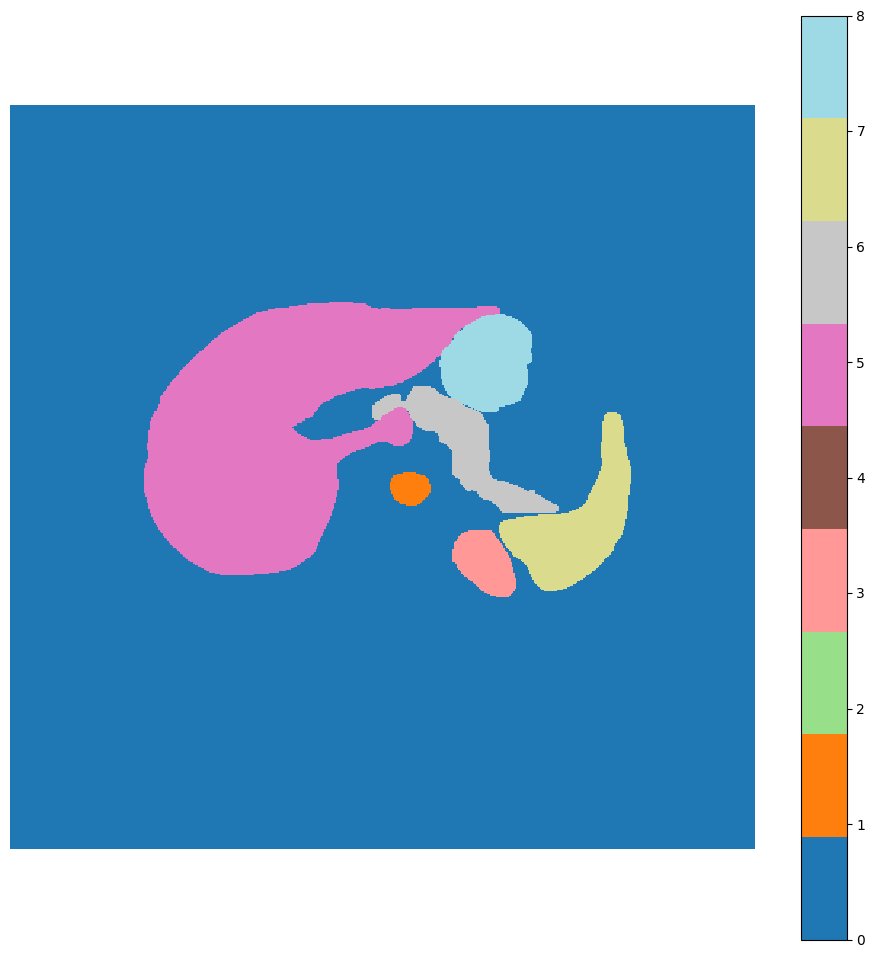

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


nifti_file = nib.load('/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/case0002_img.nii.gz')
data = nifti_file.get_fdata()
imag = data[:,:,110]
image = np.array(imag)


nifti_file = nib.load('/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/case0002_gt.nii.gz')
data = nifti_file.get_fdata()
imag = np.array(data)
labels = imag[:,:,110]

print(np.unique(labels))
label_cmap = plt.cm.get_cmap('tab20', 9)  

plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')  # Plot the image in grayscale
plt.imshow(labels, cmap=label_cmap, interpolation = 'nearest',alpha=1)  # Plot the labels with transparency
plt.colorbar(ticks=range(15))  # Add a color bar for the labels
#plt.title('Image with 8 Labels')
plt.axis('off')  # Turn off axis
plt.show()


/tmp/ipykernel_53566/3855849506.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_cmap_pred = plt.cm.get_cmap('tab20', 9)
/tmp/ipykernel_53566/3855849506.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_cmap_gt = plt.cm.get_cmap('tab20b', 9)


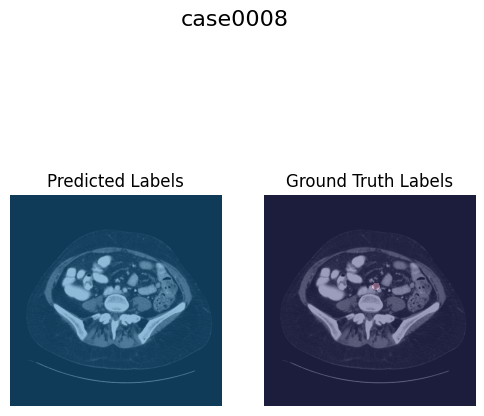

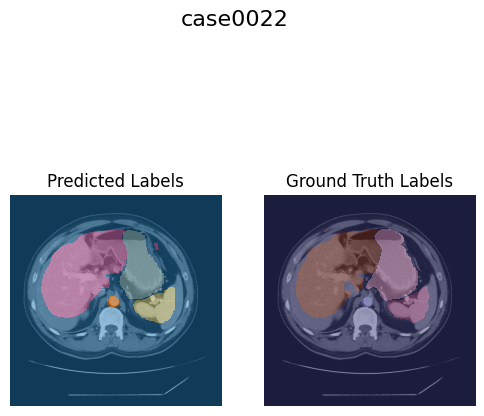

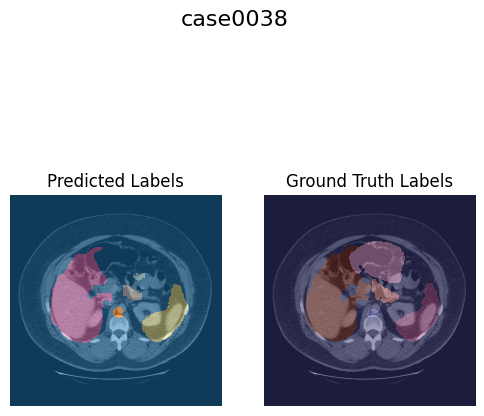

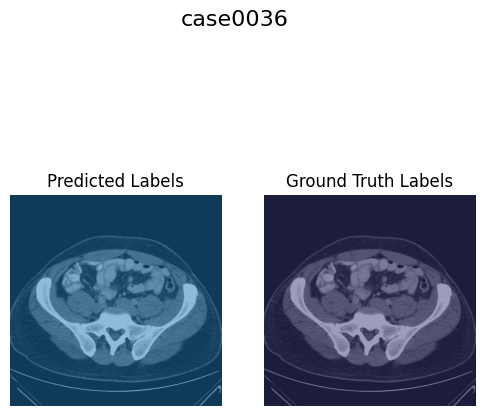

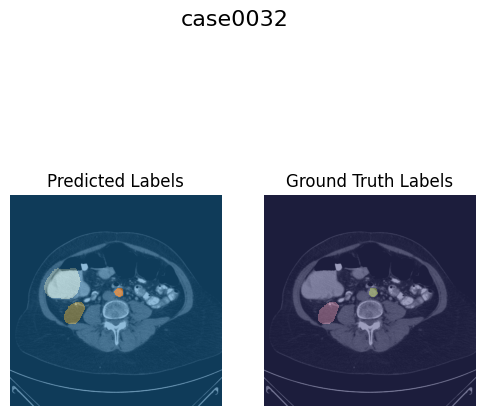

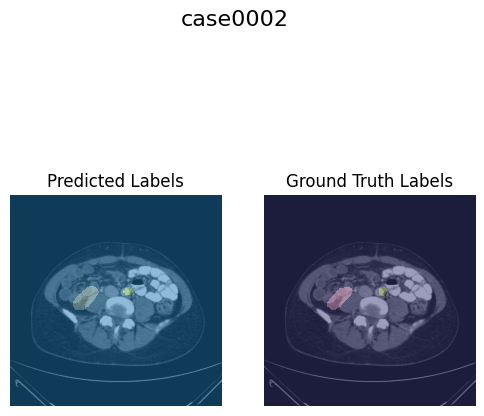

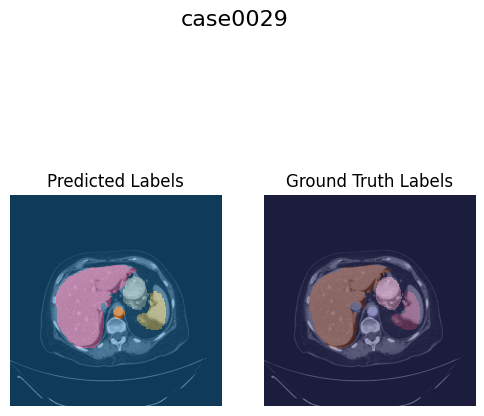

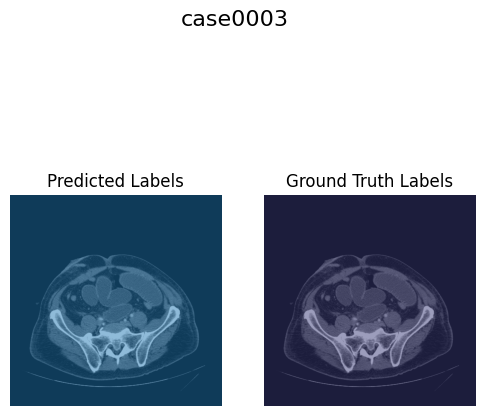

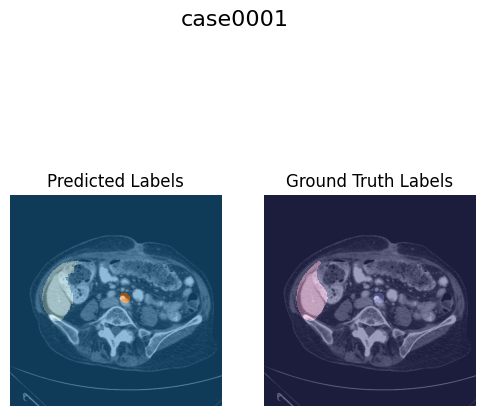

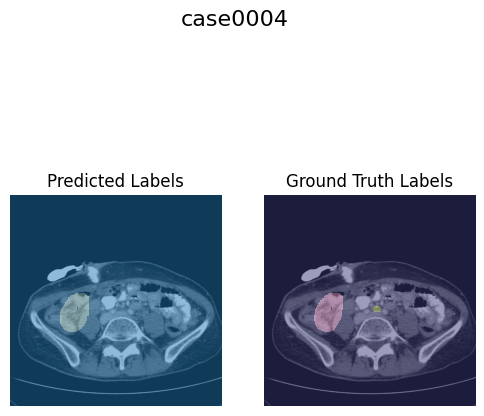

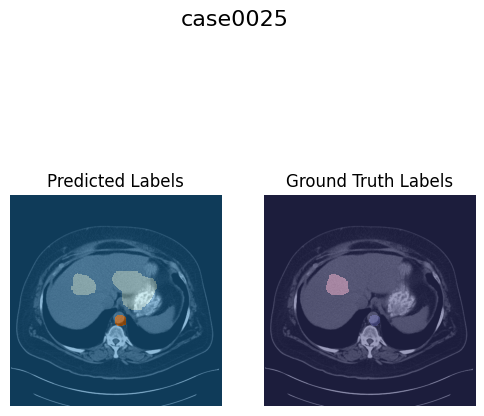

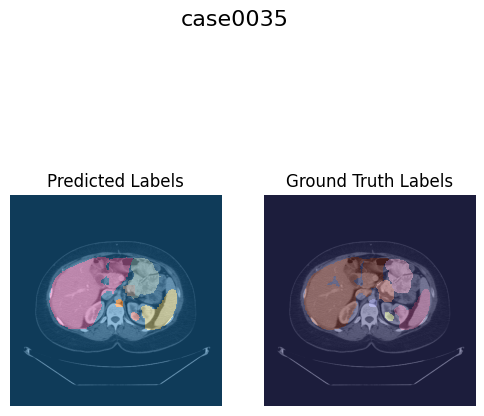

In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
img_extn = '_img.nii.gz'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'

# Plotting images for each case
for case in case_list:
    # Load the image corresponding to the current case
    nifti_file = nib.load(dir + case + img_extn)
    data = nifti_file.get_fdata()
    image = np.array(data[:, :, 70])

    # Load predicted and ground truth labels
    labels_nifti = nib.load(dir + case + pred_extn)
    labels_pred = np.array(labels_nifti.get_fdata()[:, :, 77])

    labels_gt_nifti = nib.load(dir + case + gt_extn)
    labels_gt = np.array(labels_gt_nifti.get_fdata()[:, :, 77])

    # Define color maps for labels
    label_cmap_pred = plt.cm.get_cmap('tab20', 9)
    label_cmap_gt = plt.cm.get_cmap('tab20b', 9)

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))

    # Plot predicted labels
    axes[0].imshow(image, cmap='gray')
    axes[0].imshow(labels_pred, cmap=label_cmap_pred, interpolation='nearest', alpha=0.5)
    axes[0].set_title("Predicted Labels")

    # Plot ground truth labels
    axes[1].imshow(image, cmap='gray')
    axes[1].imshow(labels_gt, cmap=label_cmap_gt, interpolation='nearest', alpha=0.5)
    axes[1].set_title("Ground Truth Labels")

    # Set common axis labels
    for ax in axes:
        ax.axis('off')

    # Set common title
    plt.suptitle(case, fontsize=16)

    plt.show()


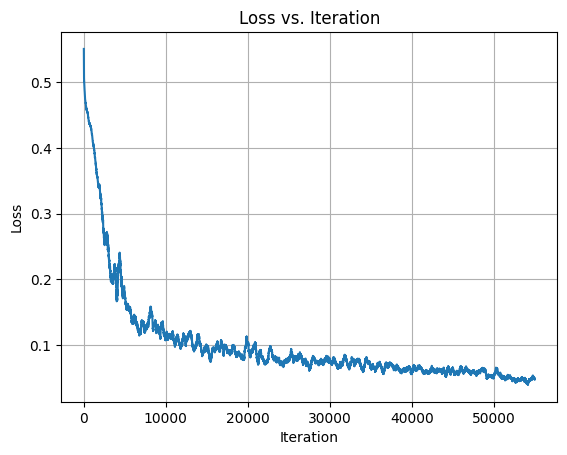

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Lists to store iteration and loss values
iterations = []
losses = []

# Read the text file
with open('/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/log.txt', 'r') as file:
    lines = file.readlines()

# Extract iteration and loss from each line and store them in lists
for line in lines:
    match = re.search(r'iteration: (\d+), loss: (\d+\.\d+)', line)
    if match:
        iteration = int(match.group(1))
        loss = float(match.group(2))
        iterations.append(iteration)
        losses.append(loss)

# Calculate moving average of losses
window_size = 300  # You can adjust this value to change the smoothness
moving_avg_losses = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')

# Plot the graph
plt.plot(iterations[:len(moving_avg_losses)], moving_avg_losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.grid(True)
plt.show()


In [5]:
import numpy as np

def calculate_dsc_3d(ground_truth, predicted):
    # Flatten both the ground truth and predicted 3D images
    ground_truth_flat = ground_truth.flatten()
    predicted_flat = predicted.flatten()
    
    # Compute intersection and union
    intersection = np.sum(ground_truth_flat * predicted_flat)
    union = np.sum(ground_truth_flat) + np.sum(predicted_flat)
    
    # Calculate DSC
    dsc = (2.0 * intersection) / (union + 1e-6)  # Adding a small epsilon to avoid division by zero
    
    return dsc * 100  # Multiply by 100 to get percentage


# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
img_extn = '_img.nii.gz'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'






nifti_file = nib.load('/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/case0038_gt.nii.gz')
data11 = nifti_file.get_fdata()
imag = data11
#print(imag.shape)
gt = np.array(imag)
gt_bi = (gt != 0).astype(int)

nifti_file1 = nib.load('/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/case0038_pred.nii.gz')
data11 = nifti_file1.get_fdata()
imag = data11
print(imag.shape)
pred = np.array(imag)
pred_bimg = (pred != 0).astype(int)



ground_truth_image = gt_bi
predicted_image = pred_bimg


dsc_percentage = calculate_dsc_3d(ground_truth_image, predicted_image)
print("Dice Similarity Coefficient (DSC): {:.2f}%".format(dsc_percentage))


(512, 512, 100)
Dice Similarity Coefficient (DSC): 85.15%


In [6]:
import numpy as np
import nibabel as nib

def calculate_dsc_3d(ground_truth, predicted, num_labels):
    dsc_total = 0
    for label in range(num_labels):
        # Binarize ground truth and predicted images for the current label
        ground_truth_label = (ground_truth == label).astype(int)
        predicted_label = (predicted == label).astype(int)
        
        # Compute intersection and union
        intersection = np.sum(ground_truth_label * predicted_label)
        union = np.sum(ground_truth_label) + np.sum(predicted_label)
        
        # Calculate DSC for the current label
        dsc = (2.0 * intersection) / (union + 1e-6)  # Adding a small epsilon to avoid division by zero
        
        # Accumulate DSC values for all labels
        dsc_total += dsc
    
    # Calculate average DSC across all labels
    average_dsc = dsc_total / num_labels
    
    return average_dsc * 100  # Multiply by 100 to get percentage

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'
num_labels = 9  # Number of labels including background

total_dsc = 0

for case in case_list:
    # Load the ground truth and predicted images for the current case
    gt_nifti = nib.load(dir + case + gt_extn)
    gt_data = gt_nifti.get_fdata()
    
    pred_nifti = nib.load(dir + case + pred_extn)
    pred_data = pred_nifti.get_fdata()
    
    # Calculate DSC for the current case
    dsc_percentage = calculate_dsc_3d(gt_data, pred_data, num_labels)
    print("DSC for {}: {:.2f}%".format(case, dsc_percentage))
    
    # Accumulate DSC values for computing the total average
    total_dsc += dsc_percentage

# Calculate total average DSC across all cases
average_dsc_total = total_dsc / len(case_list)
print("Total Average DSC: {:.2f}%".format(average_dsc_total))


DSC for case0008: 61.16%
DSC for case0022: 78.13%
DSC for case0038: 72.70%
DSC for case0036: 76.31%
DSC for case0032: 77.22%
DSC for case0002: 77.08%
DSC for case0029: 66.53%
DSC for case0003: 59.35%
DSC for case0001: 80.34%
DSC for case0004: 74.15%
DSC for case0025: 67.55%
DSC for case0035: 76.23%
Total Average DSC: 72.23%


In [7]:
import numpy as np
import nibabel as nib

def calculate_dsc_3d(ground_truth, predicted, num_labels):
    dsc_per_label = np.zeros(num_labels)
    for label in range(num_labels):
        # Binarize ground truth and predicted images for the current label
        ground_truth_label = (ground_truth == label).astype(int)
        predicted_label = (predicted == label).astype(int)
        
        # Compute intersection and union
        intersection = np.sum(ground_truth_label * predicted_label)
        union = np.sum(ground_truth_label) + np.sum(predicted_label)
        
        # Calculate DSC for the current label
        dsc = (2.0 * intersection) / (union + 1e-6)  # Adding a small epsilon to avoid division by zero
        #print(dsc)
        # Accumulate DSC value for the current label
        dsc_per_label[label] += dsc
    
    return ((dsc_per_label))*100  # Multiply by 100 to get percentage

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'
num_labels = 9  # Number of labels including background

total_dsc_per_label = np.zeros(num_labels)

for case in case_list:
    # Load the ground truth and predicted images for the current case
    gt_nifti = nib.load(dir + case + gt_extn)
    gt_data = gt_nifti.get_fdata()
    
    pred_nifti = nib.load(dir + case + pred_extn)
    pred_data = pred_nifti.get_fdata()
    
    # Calculate DSC for the current case
    dsc_per_label = calculate_dsc_3d(gt_data, pred_data, num_labels)
    
    # Accumulate DSC values for all labels across all cases
    total_dsc_per_label += dsc_per_label

# Calculate average DSC per label across all cases
average_dsc_per_label = total_dsc_per_label / len(case_list)

# Print the average DSC per label
for label, dsc in enumerate(average_dsc_per_label):
    print("Average DSC for Label {}: {:.2f}%".format(label, dsc))


Average DSC for Label 0: 99.63%
Average DSC for Label 1: 88.38%
Average DSC for Label 2: 0.00%
Average DSC for Label 3: 83.71%
Average DSC for Label 4: 76.29%
Average DSC for Label 5: 93.58%
Average DSC for Label 6: 44.25%
Average DSC for Label 7: 90.37%
Average DSC for Label 8: 73.84%


In [8]:
from scipy.spatial.distance import directed_hausdorff
import numpy as np
import nibabel as nib

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'

# Initialize list to store Hausdorff distances for each case
hausdorff_distances = []

for case in case_list:
    # Load the ground truth and predicted images for the current case
    gt_nifti = nib.load(dir + case + gt_extn)
    gt_data = gt_nifti.get_fdata()
    
    pred_nifti = nib.load(dir + case + pred_extn)
    pred_data = pred_nifti.get_fdata()
    
    # Flatten the 3D arrays to 1D arrays of coordinates
    gt_coords = np.transpose(np.nonzero(gt_data))
    pred_coords = np.transpose(np.nonzero(pred_data))
    
    # Compute the directed Hausdorff distance between ground truth and predicted coordinates
    hausdorff_distance = directed_hausdorff(gt_coords, pred_coords)[0]
    
    # Append the Hausdorff distance to the list
    hausdorff_distances.append(hausdorff_distance)

# Print Hausdorff distances for each case
for i, case in enumerate(case_list):
    print("Hausdorff distance for {}: {:.2f}".format(case, hausdorff_distances[i]))

# Calculate average Hausdorff distance
average_hausdorff_distance = np.mean(hausdorff_distances)
print("Average Hausdorff distance: {:.2f}".format(average_hausdorff_distance))


Hausdorff distance for case0008: 15.00
Hausdorff distance for case0022: 13.45
Hausdorff distance for case0038: 31.21
Hausdorff distance for case0036: 13.34
Hausdorff distance for case0032: 17.06
Hausdorff distance for case0002: 15.30
Hausdorff distance for case0029: 24.52
Hausdorff distance for case0003: 23.43
Hausdorff distance for case0001: 13.00
Hausdorff distance for case0004: 16.40
Hausdorff distance for case0025: 9.43
Hausdorff distance for case0035: 9.70
Average Hausdorff distance: 16.82


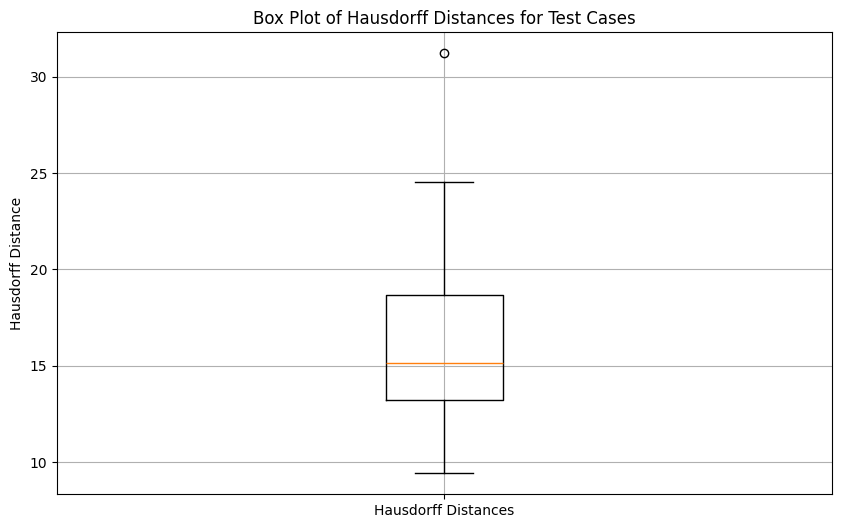

In [9]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'

# Initialize list to store Hausdorff distances for each case
hausdorff_distances = []

for case in case_list:
    # Load the ground truth and predicted images for the current case
    gt_nifti = nib.load(dir + case + gt_extn)
    gt_data = gt_nifti.get_fdata()
    
    pred_nifti = nib.load(dir + case + pred_extn)
    pred_data = pred_nifti.get_fdata()
    
    # Flatten the 3D arrays to 1D arrays of coordinates
    gt_coords = np.transpose(np.nonzero(gt_data))
    pred_coords = np.transpose(np.nonzero(pred_data))
    
    # Compute the directed Hausdorff distance between ground truth and predicted coordinates
    hausdorff_distance = directed_hausdorff(gt_coords, pred_coords)[0]
    
    # Append the Hausdorff distance to the list
    hausdorff_distances.append(hausdorff_distance)

# Create a box plot of Hausdorff distances
plt.figure(figsize=(10, 6))
plt.boxplot(hausdorff_distances)
plt.xticks([1], ['Hausdorff Distances'])
plt.ylabel('Hausdorff Distance')
plt.title('Box Plot of Hausdorff Distances for Test Cases')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import nibabel as nib
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt

# Read the data from the .txt file
with open("/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/lists/lists_Synapse/test_vol.txt", "r") as file:
    data = file.readlines()

# Strip whitespace and newline characters from each line and create a list
case_list = [case.strip() for case in data]

# Directory where the images are located
dir = '/home/shivam/Desktop/shivam/classiitb/mic/ParaTransCNN-master/checkpoints/ParaTransCNN_SGD_0.01_50_Synapse/epoch_49_pre/'
gt_extn = '_gt.nii.gz'
pred_extn = '_pred.nii.gz'
num_labels = 8  # Number of labels including background

# Initialize lists to store Hausdorff distances for each label
hausdorff_distances_per_label = [[] for _ in range(num_labels)]

# Calculate Hausdorff distances for each label in each case
for case in case_list:
    # Load the ground truth and predicted images for the current case
    gt_nifti = nib.load(dir + case + gt_extn)
    gt_data = gt_nifti.get_fdata()
    
    pred_nifti = nib.load(dir + case + pred_extn)
    pred_data = pred_nifti.get_fdata()
    
    # Compute Hausdorff distance for each label
    for label in range(num_labels):
        # Binarize ground truth and predicted images for the current label
        gt_coords = np.transpose(np.nonzero(gt_data == label))
        pred_coords = np.transpose(np.nonzero(pred_data == label))
        
        if len(gt_coords) > 0 and len(pred_coords) > 0:
            # Compute the directed Hausdorff distance between ground truth and predicted coordinates
            hausdorff_distance = directed_hausdorff(gt_coords, pred_coords)[0]
            
            # Append the Hausdorff distance to the corresponding list
            hausdorff_distances_per_label[label].append(hausdorff_distance)

# Create box plot for Hausdorff distances of each label
plt.figure(figsize=(10, 6))
plt.boxplot(hausdorff_distances_per_label, labels=[f"Label {label}" for label in range(num_labels)])
plt.title("Hausdorff Distances for Each Label")
plt.xlabel("Label")
plt.ylabel("Hausdorff Distance")
plt.grid(True)
plt.show()
